# EOS-2.ipynb

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
# Gibbs SeaWater (GSW) Oceanographic Toolbox of TEOS-10. 
import gsw

In [3]:
# retrieve the actual measurements of 
# cond., pres., and temp. from the CTD files,
# includes other values like Salinity (PSS) and Density

# SALINITY and DENSITY are DERIVED PARAMETERS - they are
# calculated for seawater/saline conditions

# WE want to figure out what the density of a freshwater body would look like

total_df = pd.read_csv('../data/total_df.csv') # load in data

# Keystone Cove
KEY_Full = total_df[total_df['Area'] == 'KEY'].copy() # filter by area
KEY_Full['UTC Time'] = pd.to_datetime(KEY_Full['UTC Time'])
KEY_18 = KEY_Full[KEY_Full['UTC Time'].dt.date == pd.to_datetime('2025-05-18').date()]

# Harding Cove
HAR_Full = total_df[total_df['Area'] == 'HAR'].copy()
HAR_Full['UTC Time'] = pd.to_datetime(HAR_Full['UTC Time'])
HAR_17 = HAR_Full[HAR_Full['UTC Time'].dt.date == pd.to_datetime('2025-05-17').date()]

We want to compare the International Equation of State for Seawater, the equation that the CTD used in-house, to an equation that finds density via Total Disolved Solids (TDS) calculation. 

In [4]:
def freshwater_density(T_C, SpC_uScm): 
    """
    Estimate freshwater density using temperature and specific conductance.

    Parameters:
    T_C : float or array-like
        Temperature in degrees Celsius
    SpC_uScm : float or array-like
        Specific conductance in µS/cm

    Returns:
    density : float or array-like
        Estimated water density in kg/m^3
    """
    # Pure water density from Chen & Millero (1986)
    rho_0 = (999.842594 + 6.793952e-2 * T_C - 9.095290e-3 * T_C**2 +
             1.001685e-4 * T_C**3 - 1.120083e-6 * T_C**4 + 6.536332e-9 * T_C**5)
    
    # Empirical correction for dissolved ions (TDS effect)
    alpha = 0.00025  # kg/m^3 per µS/cm
    delta_rho = alpha * SpC_uScm

    return rho_0 + delta_rho


In [5]:
rho = freshwater_density(HAR_17['Temperature (°C)'], HAR_17['Specific Conductance (µS/cm)'])

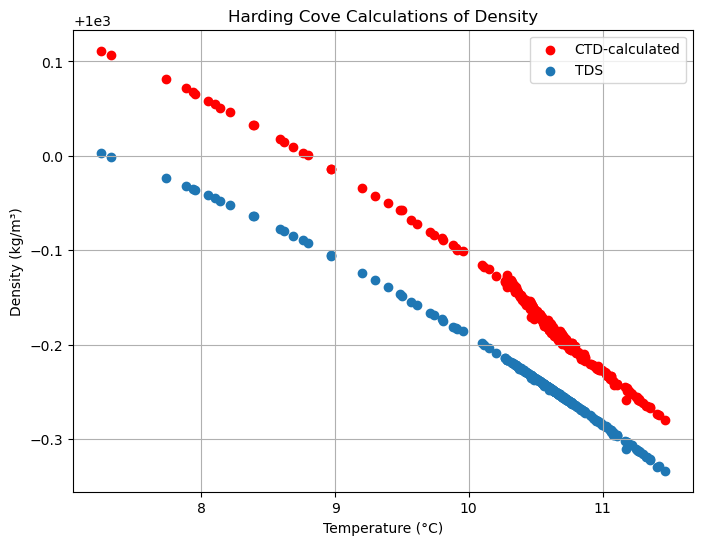

In [6]:
fig, ax = plt.subplots(figsize=(8, 6))

ax.scatter(HAR_17['Temperature (°C)'], HAR_17['Density (kg/m³)'],label='CTD-calculated', c='red')
#ax.scatter(KEY_18['Temperature (°C)'], KEY_18['Density (kg/m³)'],label='CTD-calculated', c='purple')
ax.scatter(HAR_17['Temperature (°C)'], rho, label='TDS')
#ax.plot(t_vals, rho_gsw, label='GSW TEOS-10')
#ax.scatter(HAR_17['Temperature (°C)'], rho_real, label='gsw-calculated')
#ax.scatter(KEY_18['Temperature (°C)'], rho_real, label='gsw-calculated')

ax.set_title("Harding Cove Calculations of Density")
ax.set_xlabel('Temperature (°C)')
ax.set_ylabel('Density (kg/m³)')
plt.legend()
plt.grid(True)
plt.show()

In [7]:
rho = freshwater_density(KEY_18['Temperature (°C)'], KEY_18['Specific Conductance (µS/cm)'])

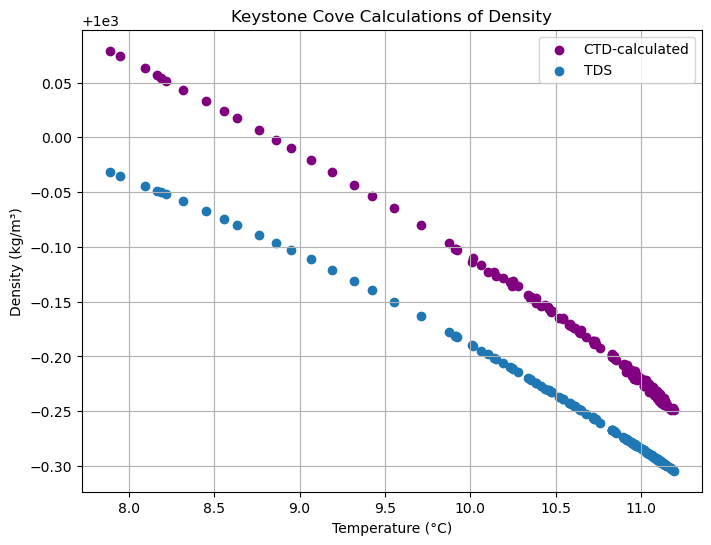

In [8]:
fig, ax = plt.subplots(figsize=(8, 6))

ax.scatter(KEY_18['Temperature (°C)'], KEY_18['Density (kg/m³)'],label='CTD-calculated', c='purple')
ax.scatter(KEY_18['Temperature (°C)'], rho, label='TDS')
#ax.scatter(HAR_17['Temperature (°C)'], rho_real, label='gsw-calculated')
#ax.scatter(KEY_18['Temperature (°C)'], rho_real, label='gsw-calculated')

ax.set_title("Keystone Cove Calculations of Density")
ax.set_xlabel('Temperature (°C)')
ax.set_ylabel('Density (kg/m³)')
plt.legend()
plt.grid(True)
plt.show()

In [12]:
# typical range of values within the datasets

# temperature (degrees C)
t_vals = np.linspace(7, 12, 100)

# conductivity (microSiemens per centimeter)
c_vals = np.linspace(.284, .314 , 100)

# pressure (decibar)
p_vals = np.linspace(0, 4, 100)

# convert conductivity 
SP = gsw.conversions.SP_from_C(c_vals, t_vals, p_vals)
rho_gsw = gsw.density.rho(SP, t_vals, p_vals)

In [13]:
rho_real_key = gsw.density.rho(KEY_18['Salinity (PSS)'], KEY_18['Temperature (°C)'], KEY_18['Pressure (dbar)'])
rho_real_har = gsw.density.rho(HAR_17['Salinity (PSS)'], HAR_17['Temperature (°C)'], HAR_17['Pressure (dbar)'])

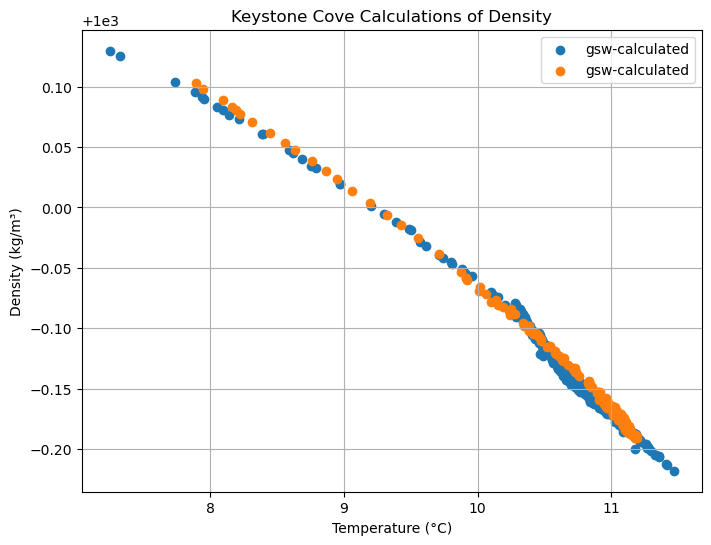

In [16]:
fig, ax = plt.subplots(figsize=(8, 6))

ax.scatter(HAR_17['Temperature (°C)'], rho_real_har, label='gsw-calculated')
ax.scatter(KEY_18['Temperature (°C)'], rho_real_key, label='gsw-calculated')

ax.set_title("Keystone Cove Calculations of Density")
ax.set_xlabel('Temperature (°C)')
ax.set_ylabel('Density (kg/m³)')
plt.legend()
plt.grid(True)
plt.show()